# Introducción al Aprendizaje Automatizado: Trabajo Práctico N° 3
## Natalia Mellino

In [1]:
# imports
from sklearn.naive_bayes import GaussianNB
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
import warnings
import pickle
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

from ej4tp1 import ej4tp1, generate_dataframe_a, generate_dataframe_b
from dimensionalidad_ann import dim_ann
from espirales_anidadas import generate_points_c

## Ejercicio 1: Dimensionalidad

In [140]:
def ej1():
    ds = [2, 4, 6, 8, 16, 32]

    test_errors_a = []
    test_errors_b = []
    train_errors_a = []
    train_errors_b = []

    dd = []
    for d in ds:
        for i in range(0, 20):
            dd.append(d)
            cols = list(map(str, list(range(0, d))))
            # Generamos el conjunto de testeo
            test_a = generate_dataframe_a(d = d, n = 10000, C = 0.78)
            test_set_a = test_a.loc[ : , cols ]
            y_test_set_a = test_a.loc[:, 'Class']

            test_b = generate_dataframe_b(d = d, n = 10000, C = 0.78)
            test_set_b = test_b.loc[ : , cols ]
            y_test_set_b = test_b.loc[:, 'Class']
            # Generamos el conjunto de entrenamiento
            train_set_a = generate_dataframe_a(d = d, n = 250, C = 0.78)
            train_set_b = generate_dataframe_b(d = d, n = 250, C = 0.78)

            # Creamos el árbol y lo entrenamos
            Xtrain_a, ytrain_a = train_set_a.loc[ : , cols ], train_set_a.loc[:, 'Class']

            clf_a = GaussianNB()
            clf_a.fit(Xtrain_a, ytrain_a)

            Xtrain_b, ytrain_b = train_set_b.loc[ : , cols ], train_set_b.loc[:, 'Class']
            clf_b = GaussianNB()
            clf_b.fit(Xtrain_b, ytrain_b)

            # Predecimos sobre el conjunto de testeo
            prediction_a = clf_a.predict(test_set_a)
            prediction_b = clf_b.predict(test_set_b)
            prediction_train_a = clf_a.predict(train_set_a.loc[ : , cols])
            prediction_train_b = clf_b.predict(train_set_b.loc[ : , cols])

            # Guardamos el error (1 - accuracy) sobre el conjunto de testeo
            # y el de entrenamiento.
            test_errors_a.append(1 - accuracy_score(y_test_set_a, prediction_a))
            test_errors_b.append(1 - accuracy_score(y_test_set_b, prediction_b))
            train_errors_a.append(1 - accuracy_score(train_set_a.loc[:, 'Class'], prediction_train_a))
            train_errors_b.append(1 - accuracy_score(train_set_b.loc[:, 'Class'], prediction_train_b))

    # Creamos los dataframes con cada valor de C y su respectivo error (20 errores por cada N habrá)
    df_a = pd.DataFrame({})
    df_a['d'] = dd
    df_a['Test Error'] = test_errors_a
    df_a['Train Error'] = train_errors_a

    df_b = pd.DataFrame({})
    df_b['d'] = dd
    df_b['Test Error'] = test_errors_b
    df_b['Train Error'] = train_errors_b

    # Agrupamos y calculamos el promedio de error para cada valor de C
    mean_test_error_a = df_a.groupby('d')['Test Error'].mean().to_numpy()
    mean_test_error_b = df_b.groupby('d')['Test Error'].mean().to_numpy()
    mean_train_error_a = df_a.groupby('d')['Train Error'].mean().to_numpy()
    mean_train_error_b = df_b.groupby('d')['Train Error'].mean().to_numpy()
    # Guardamos los resultados obtenidos en los dataframes
    error_df_a = pd.DataFrame({})
    error_df_a['d'] = ds
    error_df_a['Test Error'] = mean_test_error_a
    error_df_a['Train Error'] = mean_train_error_a

    error_df_b = pd.DataFrame({})
    error_df_b['d'] = ds
    error_df_b['Test Error'] = mean_test_error_b
    error_df_b['Train Error'] = mean_train_error_b

    return (error_df_a, error_df_b)


In [141]:
# Corremos el ejercicio y obtenemos los errores para bayes
error_diag, error_paral = ej1()


In [142]:
# Traemos los resultados de árboles

# Obtenemos los resultados del trabajo de árboles
ad_error_diag, ad_error_paral = ej4tp1()

In [52]:
# Traemos los resultados de redes neuronales
ann_error_diag, ann_error_paral = dim_ann()

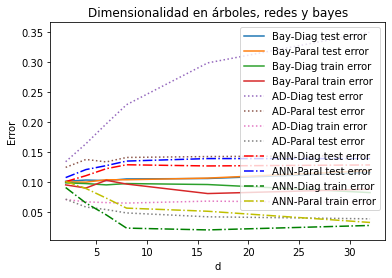

In [148]:
# Bayes
plt.plot(error_diag['d'], error_diag['Test Error'], label='Bay-Diag test error')
plt.plot(error_paral['d'], error_paral['Test Error'], label='Bay-Paral test error')
plt.plot(error_diag['d'], error_diag['Train Error'], label='Bay-Diag train error')
plt.plot(error_paral['d'], error_paral['Train Error'], label='Bay-Paral train error')

# Arboles
plt.plot(ad_error_diag['d'],  ad_error_diag['Test Error'], label='AD-Diag test error', linestyle=":")
plt.plot(ad_error_paral['d'], ad_error_paral['Test Error'], label='AD-Paral test error', linestyle=":")
plt.plot(ad_error_diag['d'],  ad_error_diag['Train Error'], label='AD-Diag train error', linestyle=":")
plt.plot(ad_error_paral['d'], ad_error_paral['Train Error'], label='AD-Paral test error', linestyle=":")

# Acá pondría mis redes... SI TAN SOLO LAS HUBIERA GUARDADO
cols = ['d', 'Test Error', 'Train Error']
ann_error_diag = pd.read_csv('ann/diag_error.csv', names=cols)
ann_error_paral = pd.read_csv('ann/paral_error.csv', names=cols)
plt.plot(ann_error_diag['d'],  ann_error_diag['Test Error'],'r',    label='ANN-Diag test error', linestyle="-.")
plt.plot(ann_error_paral['d'], ann_error_paral['Test Error'], 'b',  label='ANN-Paral test error', linestyle="-.")
plt.plot(ann_error_diag['d'],  ann_error_diag['Train Error'], 'g',  label='ANN-Diag train error', linestyle="-.")
plt.plot(ann_error_paral['d'], ann_error_paral['Train Error'], 'y', label='ANN-Paral train error', linestyle="-.")

plt.legend()
plt.xlabel('d')
plt.ylabel('Error')
plt.title("Dimensionalidad en árboles, redes y bayes")

plt.show()

## Ejercicio 2

In [6]:
def ej2_get_data():
    
    cols = ['x', 'y', 'Class']
    train = pd.read_csv('datasets/dos_elipses.data', names=cols)
    train_data = train.sample(500)
    test_data = pd.read_csv('datasets/dos_elipses.test', names=cols)

    return train_data.loc[ : , ['x', 'y']], \
           train_data.loc[ : , ['Class']],  \
           test_data.loc[ : ,  ['x', 'y']],  \
           test_data.loc[ : ,  ['Class']] 

### Dos Elipses

In [133]:
def ej2_elipses():

    X_train, y_train, X_test, y_test = ej2_get_data()

    clf = GaussianNB()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred


In [177]:
# Generamos las predicciones para redes neuronales

def ej2_ann():
    X_train, y_train, X_test, y_test = ej2_get_data()
    clf = pickle.load(open('ann/ej2-bestred.plk', 'rb'))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred

Text(0.5, 1.0, 'Elipses con Bayes')

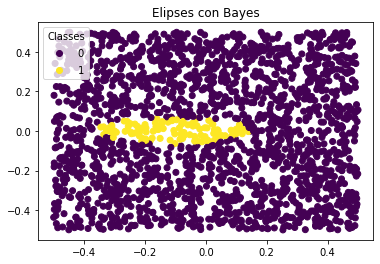

In [184]:
# Graficamos las predicciones para Bayes

x, y, pred = ej2_elipses()
scatter = plt.scatter(x, y, c=pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Elipses con Bayes')


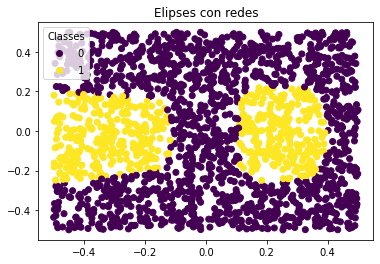

In [178]:
ann_x, ann_y, ann_pred = ej2_ann()
scatter = plt.scatter(ann_x, ann_y, c=ann_pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Elipses con redes')
plt.show()

### Espirales Anidadas

In [142]:
def espirales_bayes():
    train = generate_points_c(500)
    test = generate_points_c(2000)
    
    X_train = train.loc[:, ['x', 'y']]
    y_train = train.loc[:, ['Class']]

    X_test = test.loc[:, ['x', 'y']]
    y_test = test.loc[:, ['Class']]

    clf = GaussianNB()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred

In [156]:
def espirales_ann():
    train = generate_points_c(500)
    test = generate_points_c(2000)
    
    X_train = train.loc[:, ['x', 'y']]
    y_train = train.loc[:, ['Class']]

    X_test = test.loc[:, ['x', 'y']]
    y_test = test.loc[:, ['Class']]

    clf = pickle.load(open('ann/ej1-40.plk', 'rb'))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred

Text(0.5, 1.0, 'Espirales con bayes')

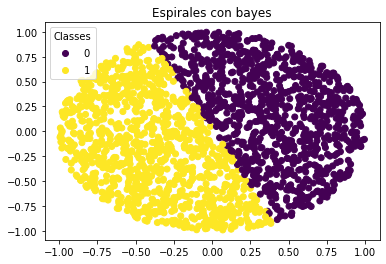

In [172]:
# Graficamos las predicciones

x, y, pred = espirales_bayes()
scatter = plt.scatter(x, y, c=pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Espirales con bayes')

Text(0.5, 1.0, 'Espirales con redes')

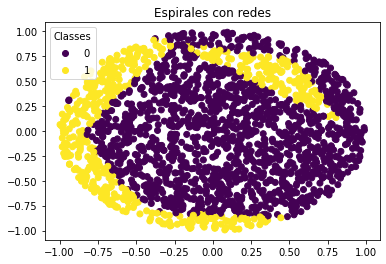

In [215]:
# Graficamos las predicciones

x, y, pred = espirales_ann()
scatter = plt.scatter(x, y, c=pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Espirales con redes')

## Ejercicio 3

In [14]:
def discretizar(X_train, y_train, X_val, y_val, X_test, y_test, nbins):
    errores_train = []
    errores_val = []
    errores_test = []
    best_bin = None
    best_error = None
    best_discretizador = None
    best_clf = None

    for nbin in nbins:
        disc = KBinsDiscretizer(n_bins=nbin, encode='ordinal', strategy='uniform')
        disc.fit(X_train)
        dX_train = disc.transform(X_train)
        dX_val = disc.transform(X_val)
        dX_test = disc.transform(X_test)

        clf = CategoricalNB(min_categories=nbin)
        clf.fit(dX_train, y_train)

        y_train_pred = clf.predict(dX_train)
        y_val_pred   = clf.predict(dX_val)
        y_test_pred  = clf.predict(dX_test)

        errores_train.append(1 - accuracy_score(y_train, y_train_pred))
        e_val = 1 - accuracy_score(y_val, y_val_pred)
        errores_val.append(e_val)
        errores_test.append(1 - accuracy_score(y_test, y_test_pred))

        if best_error is None or e_val < best_error:
            best_bin = nbin
            best_clf = clf
            best_discretizador = disc

        
    return errores_train, errores_val, errores_test, best_bin, best_discretizador, best_clf


## Ejercicio 4

In [ ]:
def ej4_get_data():
    cols = ['x', 'y', 'Class']
    train = pd.read_csv('datasets/dos_elipses.data', names=cols)
    train_data = train.sample(500)

    X_train, X_val, y_train, y_val = train_test_split(
        train_data.loc[ : , ['x', 'y'] ], 
        train_data.loc[ : , ['Class'] ], 
        test_size=0.2, 
        random_state=0
    )

    test_data = pd.read_csv('datasets/dos_elipses.test', names=cols)

    return X_train, y_train, X_val, y_val, \
           test_data.loc[ : ,  ['x', 'y']],  \
           test_data.loc[ : ,  ['Class']]

    

In [105]:
def get_data_espirales():
    train = generate_points_c(400)
    val = generate_points_c(100)
    test = generate_points_c(2000)
    
    X_train = train.loc[:, ['x', 'y']]
    y_train = train.loc[:, ['Class']]

    X_val = val.loc[:, ['x', 'y']]
    y_val = val.loc[:, ['Class']]

    X_test = test.loc[:, ['x', 'y']]
    y_test = test.loc[:, ['Class']]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [50]:
def ej4_elipses():
    X_train, y_train, X_val, y_val, X_test, y_test = ej4_get_data()
    bins = list(range(2, 15))
    et, ev, ett, bb, bdisc, bclf = discretizar(X_train, y_train, X_val, y_val, X_test, y_test, bins)

    plt.plot(bins, et, label='train')
    plt.plot(bins, ev, label='validacion')
    plt.plot(bins, ett, label='test')
    plt.legend()

    return X_test, y_test, bb, bdisc, bclf

In [106]:
def ej4_espirales():
    X_train, y_train, X_val, y_val, X_test, y_test = get_data_espirales()
    bins = list(range(2, 15))
    et, ev, ett, bb, bdisc, bclf = discretizar(X_train, y_train, X_val, y_val, X_test, y_test, bins)

    plt.plot(bins, et, label='train')
    plt.plot(bins, ev, label='validacion')
    plt.plot(bins, ett, label='test')
    plt.title('Errores en espirales')
    plt.legend()

    return X_test, y_test, bb, bdisc, bclf

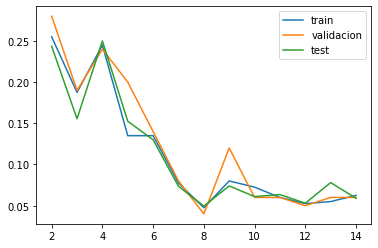

In [55]:
# Graficamos los errores para el problema de las elipses
X_test, y_test, best_bin, best_disc, best_clf = ej4_elipses()

Text(0.5, 1.0, 'Predicciones para elipses')

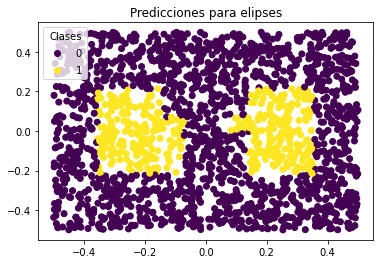

In [56]:
# Graficamos las predicciones sobre el conjunto de test
dX_test = best_disc.transform(X_test)
y_pred = best_clf.predict(dX_test)

scatter = plt.scatter(X_test.loc[:, ['x']], X_test.loc[:, ['y']], c=y_pred)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title('Predicciones para elipses')


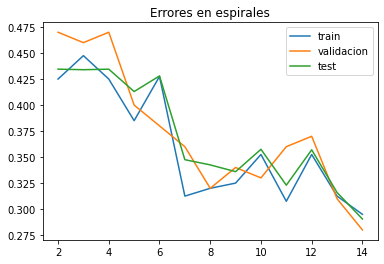

In [119]:
# Graficamos los errores para el problema de las espirales
eX_test, ey_test, ebest_bin, ebest_disc, ebest_clf = ej4_espirales()

Text(0.5, 1.0, 'Predicciones para espirales')

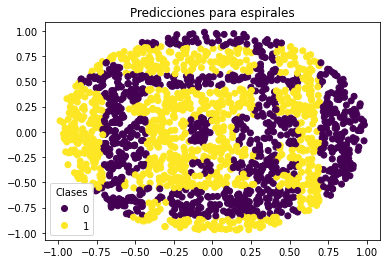

In [120]:
# Graficamos las predicciones sobre el conjunto de test
edX_test = best_disc.transform(eX_test)
ey_pred = best_clf.predict(edX_test)

scatter = plt.scatter(eX_test.loc[:, ['x']], eX_test.loc[:, ['y']], c=ey_pred)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title('Predicciones para espirales')

Se probo en el caso de las espirales aumentar la cantidad de bines, y agregarle mas
datos para entrenar pero el error no mejora.

## Ejercicio 5

In [15]:
def ej5():
    X, y = fetch_20newsgroups(subset="train", return_X_y=True, remove=["headers"])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)
    X_test, y_test = fetch_20newsgroups(subset="test", return_X_y=True, remove=["headers"]) 

    alfas = [10 ** (-i) for i in range(0, 5)]
    lens = [1000, 2000, 3000, 4000]

    e_train = e_val = e_test = []
    best_val = None
    best_test_error = None
    best_train_error = None
    best_clf = None
    best_len = None
    best_bin = None
    best_alfa = None
    matrix = None

    for l in lens:
        for alfa in alfas:
            largo_diccionario = l

            vec = CountVectorizer(stop_words='english', max_features=largo_diccionario)

            Xvec_train = vec.fit_transform(X_train).toarray()
            Xvec_test = vec.transform(X_test).toarray()
            Xvec_val = vec.transform(X_val).toarray()
            
            clf = MultinomialNB(alpha=alfa)
            clf.fit(Xvec_train, y_train)

            y_train_pred = clf.predict(Xvec_train)
            y_test_pred = clf.predict(Xvec_test)
            y_val_pred = clf.predict(Xvec_val)

            error_train = 1 - accuracy_score(y_train, y_train_pred)
            e_train.append(error_train)
            error_val = 1 - accuracy_score(y_val, y_val_pred)
            e_val.append(error_val)
            error_test = 1 - accuracy_score(y_test, y_test_pred)
            e_test.append(error_test)

            if best_val is None or error_val < best_val:
                best_val = error_val
                best_clf = clf
                best_len = largo_diccionario
                best_alfa = alfa
                best_test_error = error_test
                best_train_error = error_train
                matrix = confusion_matrix(y_test, y_test_pred)
    return e_train, e_val, e_test, best_clf, best_len, best_alfa, best_val, best_test_error, best_train_error, matrix

            

In [16]:
e_train, e_val, e_test, best_clf, best_len, best_alfa, best_val, test_error, train_error, matrix = ej5()
print(f'Mejor alfa: {best_alfa} con longitud de dic {best_len} y un error de validación de {best_val}')

Mejor alfa: 0.1 con longitud de dic 4000 y un error de validación de 0.23223753976670203


In [18]:
# Overfitting ?

print(f'train_error')
print(test_error)

0.1355332940483206
0.2939458311205523


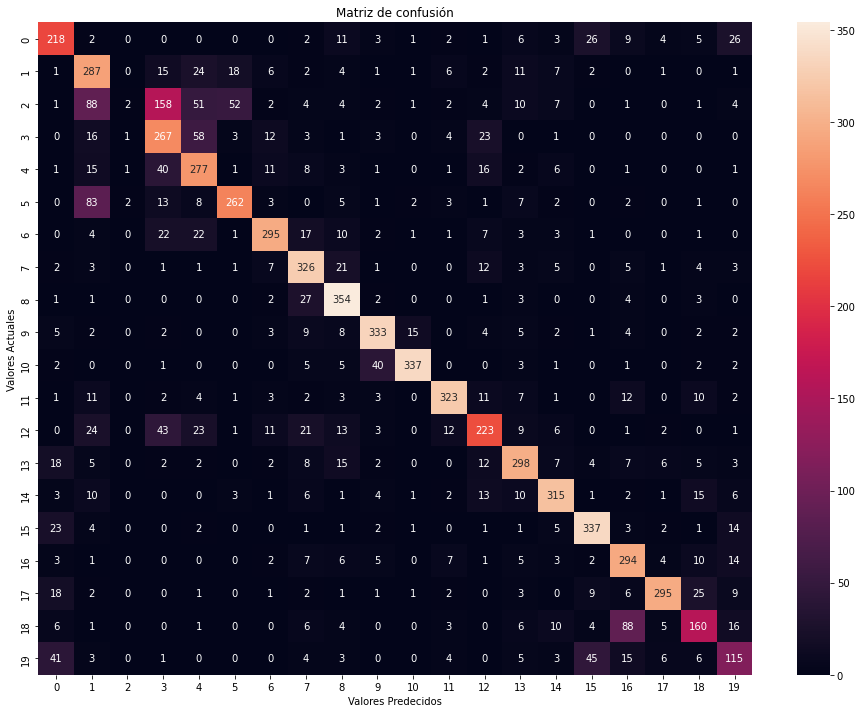

In [10]:
# Matriz de confusión

matrix_df = pd.DataFrame(matrix)
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True, fmt='g')
plt.title('Matriz de confusión')
plt.ylabel('Valores Actuales')
plt.xlabel('Valores Predecidos')
plt.show()

## Ejercicio 6